# Lead Scoring Case Study

# Section 1: Import Libraries

In [1]:
import os
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
from matplotlib.pyplot   import xticks
%matplotlib inline

# Section 2: Import datasets


In [2]:
os.chdir('E:/Assignment/Lead scoring group case study/Lead Scoring Assignment')
df1 = pd.read_csv("Leads.csv")  

# Section 3: Exploratary data analysis


Summarize data

In [3]:
df1.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Get datatypes and row count info

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

Get NaN Summary and Missing value treatment

In [5]:
#To know no.of rows & columns in a dataframe
df1.shape

(9240, 37)

In [6]:
#Finding how many unique rows are present in dataset. 
unique = df1['Prospect ID'].unique()
len(unique)

#It is observed there are 9240 unique rows which means there are no duplicates

9240

In [7]:
#Verify statistical details of dataframe
df1.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
df1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

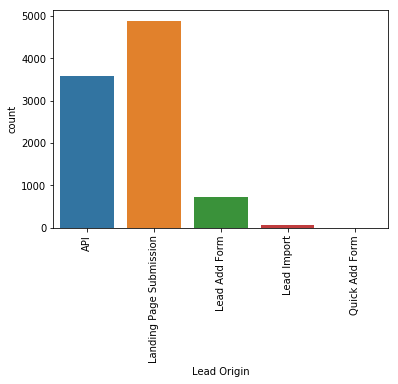

In [9]:
#Univariate analysis
sns.countplot(df1['Lead Origin'])
xticks(rotation = 90)

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

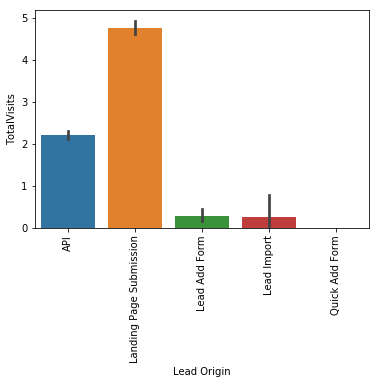

In [10]:
#Bivariate analysis
sns.barplot(x='Lead Origin', y='TotalVisits', data= df1)
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

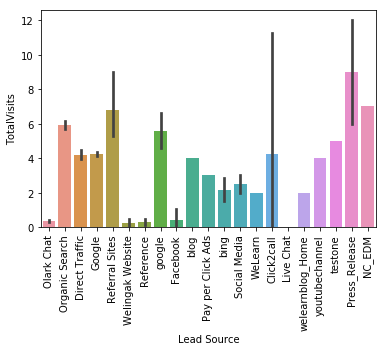

In [11]:
#Bivariate analysis
sns.barplot(x='Lead Source', y='TotalVisits', data= df1)
xticks(rotation = 90)


## Section 4: Data cleaning

In [12]:
# As we can observe that there are select values for many column.
#This is because customer did not select any option from the list, hence it shows select.
# Select values are as good as NULL.

# Converting 'Select' values to NaN.
df1 = df1.replace('Select', np.nan)

In [13]:
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [14]:
df1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [15]:
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

Dropping the columns which are having the Null Percentage  more than 30%

In [16]:
df1 = df1.drop(df1.loc[:,list(round(100*(df1.isnull().sum()/len(df1.index)), 2)>30)].columns, 1)

In [17]:
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

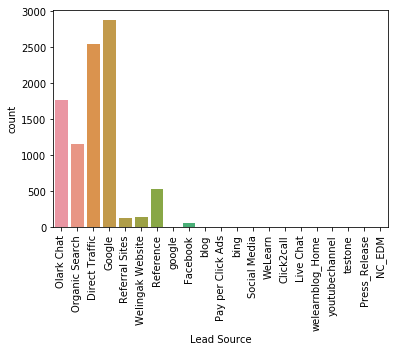

In [18]:
sns.countplot(df1['Lead Source'])
xticks(rotation = 90)

From the above Plot we can see google is having the Highest Lead source Hence we can Replace 0.39% Null values with Google 

In [19]:
df1['Lead Source'] = df1['Lead Source'].replace(np.nan, 'Google')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

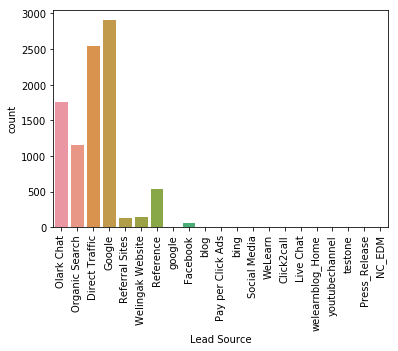

In [20]:
sns.countplot(df1['Lead Source'])
xticks(rotation = 90)

#From the above plot we can see Google is spelt two times we want to Merge it.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

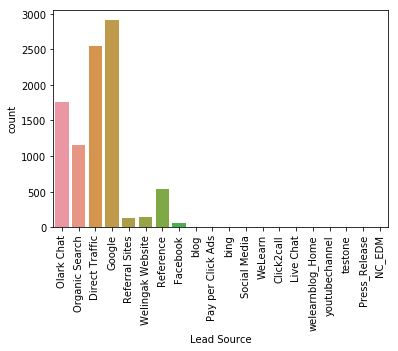

In [21]:
#Finding and replacing Google into unique format
df1['Lead Source'].replace(to_replace =['google'],  value ='Google', inplace= True)

#Verifying after replace
sns.countplot(df1['Lead Source'])
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

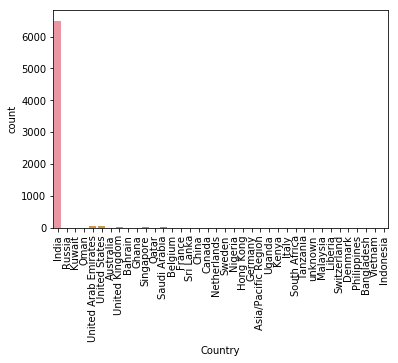

In [22]:
#Handling missing values in 'Country' column. Lets visualize data first
sns.countplot(x='Country', data=df1)
xticks(rotation = 90)

From the above Plot we can see India is having the highest number of times in 'Country' column.So we can impute 26.63% of missing values with India

In [23]:
#Imputing with India
df1['Country'] = df1['Country'].replace(np.nan, 'India')

#Verifyng missing values after imputation
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [24]:
#Renaming columns 'What is your current occupation' & 'What matters most to you in choosing a course'
df1.rename(columns = {'What is your current occupation': 'Occupation'},inplace= True)
df1.rename(columns = {'What matters most to you in choosing a course': 'Course Motto'},inplace= True)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

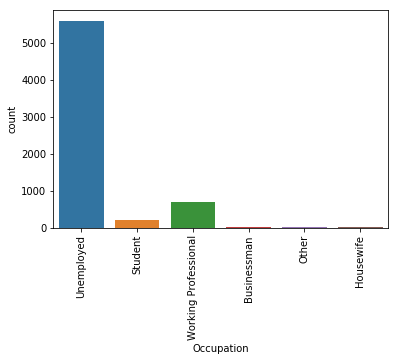

In [25]:
#Handling missing values in 'Occupation' column. Lets visualize data first
sns.countplot(x='Occupation',  data=df1)
xticks(rotation = 90)

From the above Plot we can see Unemployed is having the highest number of count in 'Occupation' column.So we can impute 29.11% of missing values with Unemployed

In [26]:
#Imputing with missing values inn 'Occupation' with 'Unemployed'
df1['Occupation'] = df1['Occupation'].replace(np.nan, 'Unemployed')

#Verifyng missing values after imputation
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.00
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Country                                      0.00
Occupation                                   0.00
Course Motto                                29.32
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

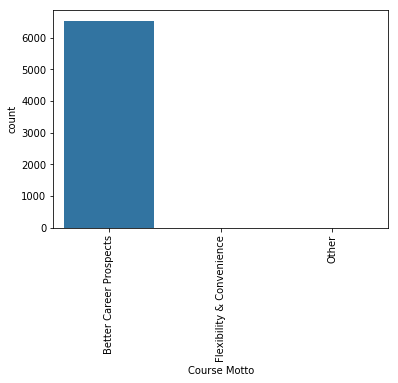

In [27]:
#Handling missing values in 'Course Motto' column. Lets visualize data first
sns.countplot(x='Course Motto',  data=df1)
xticks(rotation = 90)

In [28]:
#Imputing with missing values inn 'Course Motto' with 'Better Career Prospects'
df1['Course Motto'] = df1['Course Motto'].replace(np.nan, 'Better Career Prospects')

#Verifyng missing values after imputation
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Country                                     0.00
Occupation                                  0.00
Course Motto                                0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendati

In [29]:
#Verifying missing values
df1[np.isnan(df1['TotalVisits'])]

#Imputing the missing values in 'TotalVisits' with median
df1['TotalVisits'].fillna((df1['TotalVisits'].median()), inplace=True)

In [30]:
#Verifyng missing values after imputation
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 0.00
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Country                                     0.00
Occupation                                  0.00
Course Motto                                0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendati

In [31]:
#Verifying missing values
df1[np.isnan(df1['Page Views Per Visit'])]

#Imputing the missing values in 'Page Views Per Visit' with median
df1['Page Views Per Visit'].fillna((df1['Page Views Per Visit'].median()), inplace=True)



In [32]:
#Verifyng missing values after imputation
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 0.00
Total Time Spent on Website                 0.00
Page Views Per Visit                        0.00
Last Activity                               1.11
Country                                     0.00
Occupation                                  0.00
Course Motto                                0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendati

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

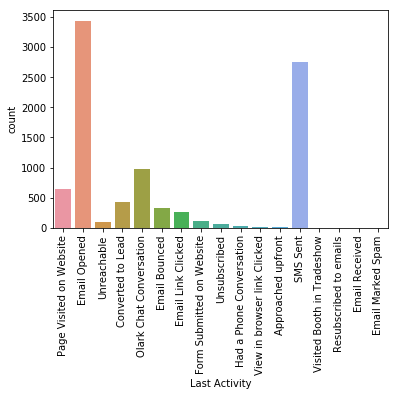

In [33]:
#Handling missing values in 'Last Activity' column. Lets visualize data first
sns.countplot(x='Last Activity',  data=df1)
xticks(rotation = 90)

From the above Plot we can see Email Opened is having the highest number of count in 'Last Activity' column.So we can impute  missing values with Email Opened

In [34]:
#Imputing with missing values in 'Last Activity' with 'Email Opened'
df1['Last Activity'] = df1['Last Activity'].replace(np.nan, 'Email Opened')

#Verifyng missing values after imputation
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Occupation                                  0.0
Course Motto                                0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

### Outlier treatment

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text xticklabel objects>)

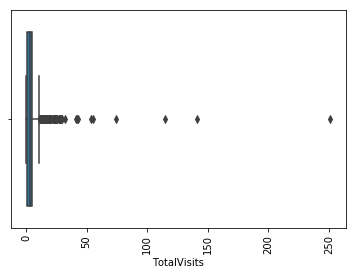

In [35]:
sns.boxplot(df1['TotalVisits'])
xticks(rotation = 90)

In [36]:
percentiles = df1['TotalVisits'].quantile([0.05,0.95]).values
df1['TotalVisits'][df1['TotalVisits'] <= percentiles[0]] = percentiles[0]
df1['TotalVisits'][df1['TotalVisits'] >= percentiles[1]] = percentiles[1]

C:\Users\Aditya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Aditya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 144x144 with 0 Axes>

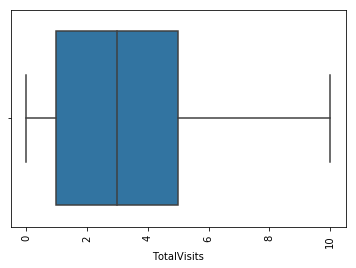

<Figure size 144x144 with 0 Axes>

In [37]:
#Verifying box plot after outlier treatment
sns.boxplot(df1['TotalVisits'])
xticks(rotation = 90)
plt.figure(figsize=(2, 2))

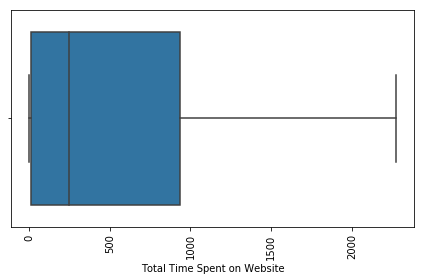

In [38]:
#Box plot for 'Total Time Spent on Website'
sns.boxplot(df1['Total Time Spent on Website'])
xticks(rotation = 90)

plt.tight_layout()

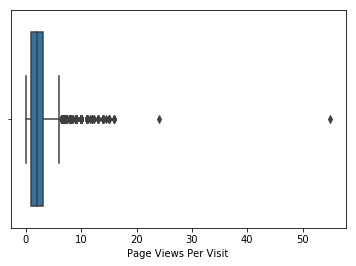

In [39]:
#Box plot for 'Page Views Per Visit'
sns.boxplot(df1['Page Views Per Visit'])


In [40]:
percentiles = df1['Page Views Per Visit'].quantile([0.05,0.95]).values
df1['Page Views Per Visit'][df1['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df1['Page Views Per Visit'][df1['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

C:\Users\Aditya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Aditya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


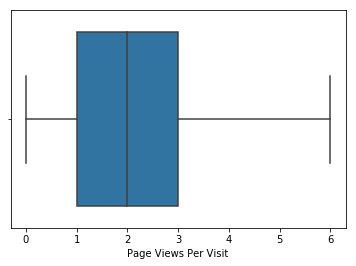

In [41]:
#Verifying box plot after outlier treatment
sns.boxplot(df1['Page Views Per Visit'])

In [42]:
#Deleting unwanted columns which has only 1 unique values in columns mentioned below as they dont explain any variance.
df1 = df1.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
          'I agree to pay the amount through cheque','Get updates on DM Content', 'Prospect ID', 'Lead Number'], 1)

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
Lead Origin                               9240 non-null object
Lead Source                               9240 non-null object
Do Not Email                              9240 non-null object
Do Not Call                               9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9240 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9240 non-null float64
Last Activity                             9240 non-null object
Country                                   9240 non-null object
Occupation                                9240 non-null object
Course Motto                              9240 non-null object
Search                                    9240 non-null object
Newspaper Article                         9240 non-null object
X Education

## Section 4: Data preparation - Dummy variable creation

#### Converting some binary variables (Yes/No) to 0/1

In [44]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview', 'Newspaper Article', 'X Education Forums', 
            'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Do Not Call', 'Do Not Email', 'Search']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df1[varlist] = df1[varlist].apply(binary_map)

df1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Occupation,Course Motto,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,0,0,0,0,0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified


In [45]:
#Create dummy variables for columns 'Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Occupation', 'Last Notable Activity'
#Above all columns has 3 or more states

In [46]:
# Creating dummy variables for the variable 'Lead Origin'
lo = pd.get_dummies(df1['Lead Origin'], drop_first = True)
#Adding the results to the master dataframe
df1 = pd.concat([df1,lo], axis=1)



# Creating dummy variables for the variable 'Lead Source'
ls = pd.get_dummies(df1['Lead Source'], drop_first = True)
#Adding the results to the master dataframe
df1 = pd.concat([df1,ls], axis=1)

# Creating dummy variables for the variable 'Last Activity'
la = pd.get_dummies(df1['Last Activity'], drop_first = True)
#Adding the results to the master dataframe
df1 = pd.concat([df1,la], axis=1)

# Creating dummy variables for the variable 'Country'
co = pd.get_dummies(df1['Country'], drop_first = True)
#Adding the results to the master dataframe
df1 = pd.concat([df1,co], axis=1)

# Creating dummy variables for the variable 'Occupation'
oc = pd.get_dummies(df1['Occupation'], drop_first = True)
#Adding the results to the master dataframe
df1 = pd.concat([df1,oc], axis=1)

# Creating dummy variables for the variable 'Last Notable Activity'
ln = pd.get_dummies(df1['Last Notable Activity'], drop_first = True)
#Adding the results to the master dataframe
df1 = pd.concat([df1,ln], axis=1)

# Creating dummy variables for the variable 'Course Motto'
cm = pd.get_dummies(df1['Course Motto'], drop_first = False)
#Adding the results to the master dataframe
df1 = pd.concat([df1,cm], axis=1)

In [47]:
#Drop columns 'Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Occupation', 'Last Notable Activity', 'Course Motto' as we have crreated dummy variables
df1.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Occupation', 'Last Notable Activity', 'Course Motto']
         ,axis=1, inplace= True)
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 112 entries, Do Not Email to Other
dtypes: float64(2), int64(11), uint8(99)
memory usage: 1.8 MB


,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked,Better Career Prospects,Flexibility & Convenience,Other
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Section 5: Test-Train Split

In [48]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df1.drop(['Converted'],axis=1)

# Putting response variable to y
y = df1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [49]:
#random_state is the seed used by the random number generator, it can be any integer.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

## Section 6: Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Aditya\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Aditya\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked,Better Career Prospects,Flexibility & Convenience,Other
1871,0,0,0.0,-0.885371,-1.266675,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6795,0,0,4.0,0.005716,-0.516439,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3516,0,0,5.0,-0.691418,0.143543,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8105,0,0,5.0,1.365219,1.553761,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3934,0,0,0.0,-0.885371,-1.266675,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [51]:
### Checking the Conversion Rate
conv = (sum(df1['Converted'])/len(df1['Converted'].index))*100
conv

38.53896103896104

We have almost 39% Conversion Rate

## Section 7: Feature Selection Using RFE

In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 25)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

In [53]:
rfe.support_

array([ True,  True, False,  True, False, False, False, False,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False,  True, False,  True, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False])

In [54]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 60),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 59),
 ('Search', False, 33),
 ('Newspaper Article', False, 16),
 ('X Education Forums', False, 50),
 ('Newspaper', True, 1),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', False, 23),
 ('A free copy of Mastering The Interview', False, 74),
 ('Landing Page Submission', False, 48),
 ('Lead Add Form', True, 1),
 ('Lead Import', False, 54),
 ('Quick Add Form', False, 12),
 ('Direct Traffic', False, 26),
 ('Facebook', False, 35),
 ('Google', False, 38),
 ('Live Chat', False, 57),
 ('NC_EDM', False, 10),
 ('Olark Chat', True, 1),
 ('Organic Search', False, 36),
 ('Pay per Click Ads', False, 52),
 ('Press_Release', False, 43),
 ('Reference', True, 1),
 ('Referral Sites', False, 37),
 ('Social Media', False, 2),
 ('WeLearn', False, 40),
 ('Welingak Website', True, 1),
 ('bing', False, 58),
 ('blog', False, 34),
 ('tes

In [55]:
col = X_train.columns[rfe.support_]

In [56]:
#variables that are to be dropped
X_train.columns
col_drop = X_train.columns[~rfe.support_]
col_drop

Index(['TotalVisits', 'Page Views Per Visit', 'Search', 'Newspaper Article',
       'X Education Forums', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Landing Page Submission',
       'Lead Import', 'Quick Add Form', 'Direct Traffic', 'Facebook', 'Google',
       'Live Chat', 'NC_EDM', 'Organic Search', 'Pay per Click Ads',
       'Press_Release', 'Referral Sites', 'Social Media', 'WeLearn', 'bing',
       'blog', 'testone', 'welearnblog_Home', 'youtubechannel',
       'Email Link Clicked', 'Email Marked Spam', 'Email Opened',
       'Email Received', 'Form Submitted on Website',
       'Page Visited on Website', 'Resubscribed to emails', 'SMS Sent',
       'Unreachable', 'Unsubscribed', 'View in browser link Clicked',
       'Visited Booth in Tradeshow', 'Bahrain', 'Bangladesh', 'Belgium',
       'Canada', 'China', 'Denmark', 'France', 'Germany', 'Ghana', 'Hong Kong',
       'India', 'Indonesia', 'Italy', 'Kenya', 'Kuwait', 'Liberia', 'Malaysia',
      

In [57]:
print("Before dropping the columns")
print(X_train.columns)
X_train = X_train.drop(col_drop,1)
print("After Dropping the columns")
print(X_train.columns)

Before dropping the columns
Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement',
       ...
       'Olark Chat Conversation', 'Page Visited on Website',
       'Resubscribed to emails', 'SMS Sent', 'Unreachable', 'Unsubscribed',
       'View in browser link Clicked', 'Better Career Prospects',
       'Flexibility & Convenience', 'Other'],
      dtype='object', length=111)
After Dropping the columns
Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Newspaper', 'Digital Advertisement', 'Lead Add Form', 'Olark Chat',
       'Reference', 'Welingak Website', 'Converted to Lead',
       'Had a Phone Conversation', 'Olark Chat Conversation', 'Australia',
       'Nigeria', 'Qatar', 'Saudi Arabia', 'Housewife', 'Working Professional',
       'Had a Phone Conversation', 'Modified', 'Olark Chat Conversatio

## Section 8: Model Building

### Assessing the model with StatsModels

In [58]:
import statsmodels.api as sm

##### Model 1

In [59]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2822.2
Date:                Mon, 10 Jun 2019   Deviance:                       5644.3
Time:                        15:33:41   Pearson chi2:                 7.25e+03
No. Iterations:                    22   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.7209      0.046    -15.811      0.000      -0.810      -0.632
Do Not Email                   -1.2521      0.161     -7.754      0.000      -1.569      -0.936
Do Not Call                    23.3728   5.58e+04      0.000      1.000   -1.09e+05    1.09e+05
Total Time Spent on Website     1.1064      0.038     28.756      0.000       1.031       1.182
Newspaper                     -25.5338   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Digital Advertisement         -22.4068   4.54e+04     -0.000      1.000   -8.91e+04     8.9e+04
Lead Add Form                   3.4191      0.460      7.425      0.000       2.517       4.322
Olark Chat                      1.0700      0.099     10.844      0.000       0.877       1.263
Reference                       0.3651      0.495      0.738      0.461      -0.605       1.335
Welingak Website                2.3912      0.851      2.809      0.005       0.723       4.060
Converted to Lead              -0.9854      0.227     -4.346      0.000      -1.430      -0.541
Had a Phone Conversation        0.6369      0.953      0.669      0.504      -1.230       2.504
Olark Chat Conversation        -1.1361      0.195     -5.826      0.000      -1.518      -0.754
Australia                      -1.1969      0.988     -1.212      0.226      -3.133       0.739
Nigeria                       -22.8455   4.32e+04     -0.001      1.000   -8.46e+04    8.46e+04
Qatar                         -23.7489   2.43e+04     -0.001      0.999   -4.76e+04    4.76e+04
Saudi Arabia                   -1.1951      0.796     -1.501      0.133      -2.756       0.366
Housewife                      23.5989   2.22e+04      0.001      0.999   -4.36e+04    4.36e+04
Working Professional            2.8098      0.185     15.215      0.000       2.448       3.172
Had a Phone Conversation        2.3058      1.454      1.586      0.113      -0.544       5.156
Modified                       -0.9279      0.085    -10.885      0.000      -1.095      -0.761
Olark Chat Conversation        -0.6646      0.372     -1.787      0.074      -1.394       0.064
===============================================================================================
"""

In [60]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.347413
6795    0.328592
3516    0.397510
8105    0.687730
3934    0.173883
4844    0.984480
3297    0.178236
8071    0.994998
987     0.123049
7423    0.812088
dtype: float64

In [61]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.34741286, 0.32859214, 0.39751021, 0.68773037, 0.17388311,
       0.98448026, 0.1782357 , 0.99499786, 0.12304859, 0.81208835])

#### Creating a dataframe with the actual converted flag and the predicted probabilities

In [62]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Conv_Prob,CustID
0,0,0.347413,1871
1,0,0.328592,6795
2,0,0.397510,3516
3,0,0.687730,8105
4,0,0.173883,3934


Creating new column 'predicted' with 1 if Conv_Prob > 0.5 else 0

In [63]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conv_Prob,CustID,predicted
0,0,0.347413,1871,0
1,0,0.328592,6795,0
2,0,0.397510,3516,0
3,0,0.687730,8105,1
4,0,0.173883,3934,0


In [64]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3573  429]
 [ 844 1622]]


In [65]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8031849103277675


#### Checking VIFs

In [66]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Add Form,15.69
7,Reference,12.96
8,Welingak Website,3.77
10,Had a Phone Conversation,2.02
18,Had a Phone Conversation,2.01
11,Olark Chat Conversation,1.95
19,Modified,1.86
6,Olark Chat,1.53
20,Olark Chat Conversation,1.32
9,Converted to Lead,1.23


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'Lead Add Form', 'Reference' has the highest VIF. So let's start by dropping that.

##### Model 2

In [68]:
X_train = X_train.drop('Lead Add Form',1)

In [69]:
X_train.columns

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Newspaper', 'Digital Advertisement', 'Olark Chat', 'Reference',
       'Welingak Website', 'Converted to Lead', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'Australia', 'Nigeria', 'Qatar',
       'Saudi Arabia', 'Housewife', 'Working Professional',
       'Had a Phone Conversation', 'Modified', 'Olark Chat Conversation'],
      dtype='object')

In [70]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2857.1
Date:                Mon, 10 Jun 2019   Deviance:                       5714.2
Time:                        15:33:43   Pearson chi2:                 7.20e+03
No. Iterations:                    22   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.6871      0.045    -15.274      0.000      -0.775      -0.599
Do Not Email                   -1.1478      0.157     -7.292      0.000      -1.456      -0.839
Do Not Call                    23.3858   5.58e+04      0.000      1.000   -1.09e+05    1.09e+05
Total Time Spent on Website     1.0766      0.038     28.411      0.000       1.002       1.151
Newspaper                     -25.4953   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Digital Advertisement         -22.4462   4.55e+04     -0.000      1.000   -8.91e+04    8.91e+04
Olark Chat                      1.0147      0.098     10.396      0.000       0.823       1.206
Reference                       3.7166      0.201     18.493      0.000       3.323       4.110
Welingak Website                5.7272      0.722      7.929      0.000       4.311       7.143
Converted to Lead              -1.0078      0.225     -4.470      0.000      -1.450      -0.566
Had a Phone Conversation        0.6239      0.945      0.660      0.509      -1.229       2.477
Olark Chat Conversation        -1.1527      0.194     -5.932      0.000      -1.534      -0.772
Australia                      -1.2186      0.980     -1.243      0.214      -3.140       0.703
Nigeria                       -22.8733   4.32e+04     -0.001      1.000   -8.48e+04    8.47e+04
Qatar                         -23.7264   2.44e+04     -0.001      0.999   -4.79e+04    4.78e+04
Saudi Arabia                   -1.2201      0.789     -1.546      0.122      -2.767       0.326
Housewife                      23.5680   2.23e+04      0.001      0.999   -4.37e+04    4.38e+04
Working Professional            2.7880      0.184     15.143      0.000       2.427       3.149
Had a Phone Conversation        2.2721      1.449      1.569      0.117      -0.567       5.111
Modified                       -0.9185      0.084    -10.873      0.000      -1.084      -0.753
Olark Chat Conversation        -0.6445      0.370     -1.742      0.081      -1.369       0.080
===============================================================================================
"""

In [71]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.348518
6795    0.336056
3516    0.397294
8105    0.686263
3934    0.175945
4844    0.983802
3297    0.186515
8071    0.994735
987     0.123351
7423    0.808250
dtype: float64

In [72]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.34851768, 0.33605562, 0.39729401, 0.68626316, 0.17594477,
       0.9838023 , 0.18651474, 0.99473519, 0.12335111, 0.80825017])

Creating a dataframe with the actual converted flag and the predicted probabilities

In [73]:
#Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Conv_Prob,CustID
0,0,0.348518,1871
1,0,0.336056,6795
2,0,0.397294,3516
3,0,0.686263,8105
4,0,0.175945,3934


In [74]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conv_Prob,CustID,predicted
0,0,0.348518,1871,0
1,0,0.336056,6795,0
2,0,0.397294,3516,0
3,0,0.686263,8105,1
4,0,0.175945,3934,0


In [75]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3575  427]
 [ 862 1604]]


In [76]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8007111935683364


So overall the accuracy hasn't dropped much.

In [77]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Had a Phone Conversation,2.02
17,Had a Phone Conversation,2.01
10,Olark Chat Conversation,1.95
18,Modified,1.86
5,Olark Chat,1.53
19,Olark Chat Conversation,1.32
8,Converted to Lead,1.23
2,Total Time Spent on Website,1.19
6,Reference,1.17
16,Working Professional,1.14


#### Above VIF values are good. But p-values are high for few variables lets re run the model by removing those features

##### Model 3

In [78]:
#Dropping few columns with high p-values
X_train = X_train.drop(['Australia', 'Nigeria', 'Qatar', 'Saudi Arabia'],1)
X_train.columns

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Newspaper', 'Digital Advertisement', 'Olark Chat', 'Reference',
       'Welingak Website', 'Converted to Lead', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'Housewife', 'Working Professional',
       'Had a Phone Conversation', 'Modified', 'Olark Chat Conversation'],
      dtype='object')

In [79]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2865.1
Date:                Mon, 10 Jun 2019   Deviance:                       5730.2
Time:                        15:33:46   Pearson chi2:                 7.21e+03
No. Iterations:                    22   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.6976      0.045    -15.551      0.000      -0.786      -0.610
Do Not Email                   -1.1582      0.158     -7.353      0.000      -1.467      -0.849
Do Not Call                    23.3873   5.58e+04      0.000      1.000   -1.09e+05    1.09e+05
Total Time Spent on Website     1.0740      0.038     28.416      0.000       1.000       1.148
Newspaper                     -25.4784   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Digital Advertisement         -22.4381   4.55e+04     -0.000      1.000   -8.91e+04    8.91e+04
Olark Chat                      1.0207      0.098     10.459      0.000       0.829       1.212
Reference                       3.7230      0.201     18.530      0.000       3.329       4.117
Welingak Website                5.7351      0.722      7.939      0.000       4.319       7.151
Converted to Lead              -1.0145      0.226     -4.497      0.000      -1.457      -0.572
Had a Phone Conversation        0.6295      0.945      0.666      0.506      -1.224       2.483
Olark Chat Conversation        -1.1538      0.194     -5.939      0.000      -1.534      -0.773
Housewife                      23.5739   2.23e+04      0.001      0.999   -4.37e+04    4.37e+04
Working Professional            2.7866      0.184     15.143      0.000       2.426       3.147
Had a Phone Conversation        2.2759      1.449      1.571      0.116      -0.563       5.115
Modified                       -0.9117      0.084    -10.805      0.000      -1.077      -0.746
Olark Chat Conversation        -0.6370      0.370     -1.723      0.085      -1.362       0.088
===============================================================================================
"""

In [80]:
#Checking VIF after re running model

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Had a Phone Conversation,2.02
13,Had a Phone Conversation,2.01
10,Olark Chat Conversation,1.95
14,Modified,1.86
5,Olark Chat,1.53
15,Olark Chat Conversation,1.32
8,Converted to Lead,1.23
2,Total Time Spent on Website,1.19
6,Reference,1.17
12,Working Professional,1.14


##### Model 4

In [81]:
#Dropping few columns with high p-values
X_train = X_train.drop(['Had a Phone Conversation', 'Housewife', 'Do Not Call', 'Newspaper', 'Digital Advertisement'],1)
X_train.columns

Index(['Do Not Email', 'Total Time Spent on Website', 'Olark Chat',
       'Reference', 'Welingak Website', 'Converted to Lead',
       'Olark Chat Conversation', 'Working Professional', 'Modified',
       'Olark Chat Conversation'],
      dtype='object')

In [82]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2880.9
Date:                Mon, 10 Jun 2019   Deviance:                       5761.9
Time:                        15:33:47   Pearson chi2:                 7.07e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.6874      0.045    -15.397      0.000      -0.775      -0.600
Do Not Email                   -1.1686      0.157     -7.423      0.000      -1.477      -0.860
Total Time Spent on Website     1.0693      0.038     28.414      0.000       0.996       1.143
Olark Chat                      1.0047      0.097     10.326      0.000       0.814       1.195
Reference                       3.7474      0.201     18.667      0.000       3.354       4.141
Welingak Website                5.7204      0.722      7.919      0.000       4.305       7.136
Converted to Lead              -1.0290      0.225     -4.569      0.000      -1.470      -0.588
Olark Chat Conversation        -1.1477      0.192     -5.964      0.000      -1.525      -0.771
Working Professional            2.7826      0.184     15.138      0.000       2.422       3.143
Modified                       -0.9041      0.084    -10.790      0.000      -1.068      -0.740
Olark Chat Conversation        -0.6423      0.369     -1.742      0.081      -1.365       0.080
===============================================================================================
"""

In [83]:
#Checking VIF after re running model

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Olark Chat Conversation,1.95
8,Modified,1.85
2,Olark Chat,1.53
9,Olark Chat Conversation,1.32
5,Converted to Lead,1.23
1,Total Time Spent on Website,1.19
3,Reference,1.16
7,Working Professional,1.13
0,Do Not Email,1.12
4,Welingak Website,1.01


#### We can consider this model 4 as we have good VIF values and low p-values for variables

In [84]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.347644
6795    0.335972
3516    0.396034
8105    0.684041
3934    0.177479
4844    0.983491
3297    0.187274
8071    0.990613
987     0.122105
7423    0.805954
dtype: float64

In [85]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.34764447, 0.33597182, 0.39603425, 0.68404143, 0.17747935,
       0.98349091, 0.1872736 , 0.99061289, 0.12210498, 0.80595427])

Creating a dataframe with the actual converted flag and the predicted probabilities

In [86]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Conv_Prob,CustID
0,0,0.347644,1871
1,0,0.335972,6795
2,0,0.396034,3516
3,0,0.684041,8105
4,0,0.177479,3934


In [87]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conv_Prob,CustID,predicted
0,0,0.347644,1871,0
1,0,0.335972,6795,0
2,0,0.396034,3516,0
3,0,0.684041,8105,1
4,0,0.177479,3934,0


In [88]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3574  428]
 [ 868 1598]]


In [89]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7996289424860853


So overall the accuracy hasn't dropped much.

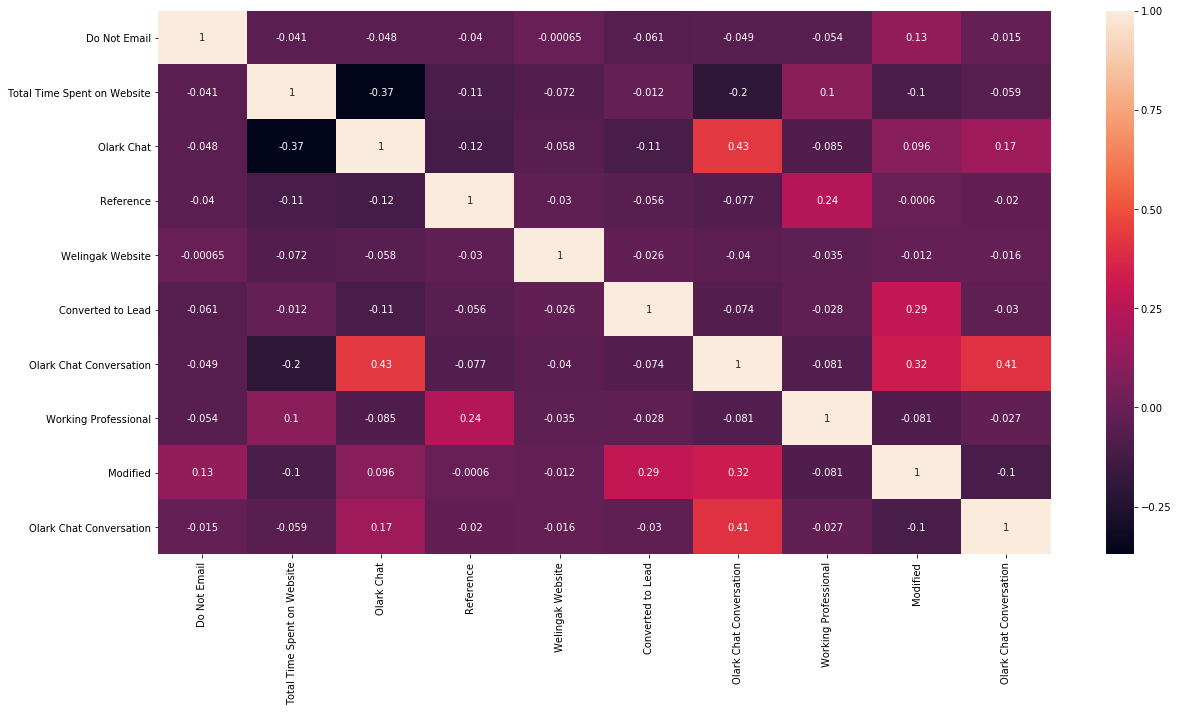

In [90]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Metrics beyond simply accuracy

In [91]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [92]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6480129764801298

In [93]:
# Let us calculate specificity
TN / float(TN+FP)

0.8930534732633684

In [94]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10694652673663169


In [95]:
# positive predictive value 
print (TP / float(TP+FP))

0.788746298124383


In [96]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8045925258892391


### Section 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [97]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [98]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, 
                                         y_train_pred_final.Conv_Prob, drop_intermediate = False )

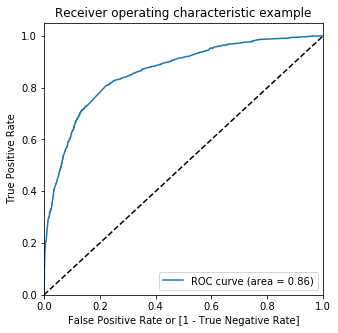

In [99]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

### Section 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [100]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(10)

,Converted,Conv_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.347644,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.335972,6795,0,1,1,1,1,0,0,0,0,0,0
2,0,0.396034,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.684041,8105,1,1,1,1,1,1,1,1,0,0,0
4,0,0.177479,3934,0,1,1,0,0,0,0,0,0,0,0
5,1,0.983491,4844,1,1,1,1,1,1,1,1,1,1,1
6,0,0.187274,3297,0,1,1,0,0,0,0,0,0,0,0
7,1,0.990613,8071,1,1,1,1,1,1,1,1,1,1,1
8,0,0.122105,987,0,1,1,0,0,0,0,0,0,0,0
9,1,0.805954,7423,1,1,1,1,1,1,1,1,1,1,0


In [101]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.571119  0.968775  0.326087
0.2   0.2  0.684292  0.900649  0.550975
0.3   0.3  0.774428  0.829684  0.740380
0.4   0.4  0.806895  0.708840  0.867316
0.5   0.5  0.799629  0.648013  0.893053
0.6   0.6  0.785405  0.568532  0.919040
0.7   0.7  0.765461  0.474453  0.944778
0.8   0.8  0.732993  0.344282  0.972514
0.9   0.9  0.692950  0.205596  0.993253


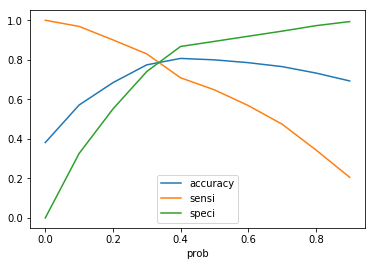

In [102]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.36 is the optimum point to take it as a cutoff probability.

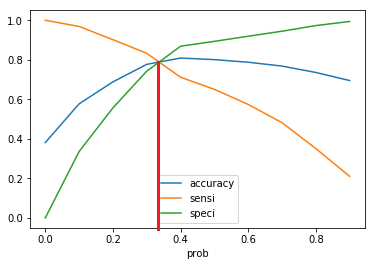

In [103]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.36 else 0)

y_train_pred_final.head()

,Converted,Conv_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.347644,1871,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.335972,6795,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.396034,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.684041,8105,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.177479,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [104]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8047309833024119

In [105]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3414,  588],
       [ 675, 1791]], dtype=int64)

In [106]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [107]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7262773722627737

In [108]:
# Let us calculate specificity
TN / float(TN+FP)

0.8530734632683659

In [109]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1469265367316342


In [110]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7528373266078184


In [111]:
# Negative predictive value
print (TN / float(TN+ FN))

0.83492296404989


## Precision and Recall

##### Precision
TP / TP + FP

In [112]:
#Looking at the confusion matrix again
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7528373266078184

##### Recall
TP / TP + FN

In [113]:
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.7262773722627737

##### We can also use Using sklearn utilities to get precision & Recall

In [114]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7528373266078184

In [115]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7262773722627737

#### Precision and recall tradeoff

In [116]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      0
 12      1
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      1
 20      1
 21      1
 22      1
 23      1
 24      1
 25      1
 26      0
 27      1
 28      1
 29      0
        ..
 6438    1
 6439    0
 6440    1
 6441    1
 6442    0
 6443    0
 6444    0
 6445    0
 6446    0
 6447    0
 6448    0
 6449    0
 6450    1
 6451    1
 6452    1
 6453    1
 6454    1
 6455    1
 6456    1
 6457    1
 6458    0
 6459    1
 6460    1
 6461    0
 6462    1
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64, 0       0
 1       0
 2       1
 3       1
 4       0
 5       1
 6       0
 7       1
 8       0
 9       1
 10      1
 11      0
 12      0
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      0
 20      1
 21      1
 22      1
 23      1
 24      1
 25      

In [117]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

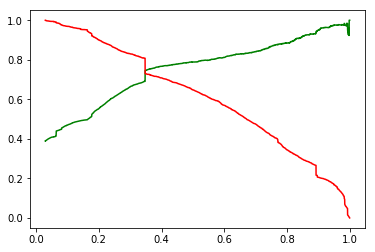

In [118]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Section 11: Making predictions on the test set

In [119]:
#Scaling test data
X_test[['Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit']])

C:\Users\Aditya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Aditya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Aditya\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [120]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked,Better Career Prospects,Flexibility & Convenience,Other
4269,0,0,8.0,0.964504,2.117849,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2376,0,0,0.0,-0.885371,-1.266675,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
7766,0,0,5.0,-0.777416,1.553761,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
9199,0,0,0.0,-0.885371,-1.266675,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4359,0,0,0.0,-0.885371,-1.266675,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [121]:
X_test[col].columns

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Newspaper', 'Digital Advertisement', 'Lead Add Form', 'Olark Chat',
       'Reference', 'Welingak Website', 'Converted to Lead', 'Email Bounced',
       'Email Bounced', 'Had a Phone Conversation', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'Olark Chat Conversation', 'Australia',
       'Nigeria', 'Qatar', 'Saudi Arabia', 'Housewife', 'Working Professional',
       'Email Link Clicked', 'Email Link Clicked', 'Email Opened',
       'Email Opened', 'Had a Phone Conversation', 'Had a Phone Conversation',
       'Modified', 'Olark Chat Conversation', 'Olark Chat Conversation',
       'Page Visited on Website', 'Page Visited on Website'],
      dtype='object')

In [122]:
X_train.columns

Index(['Do Not Email', 'Total Time Spent on Website', 'Olark Chat',
       'Reference', 'Welingak Website', 'Converted to Lead',
       'Olark Chat Conversation', 'Working Professional', 'Modified',
       'Olark Chat Conversation'],
      dtype='object')

In [123]:
#Retrieving the columns in test set as those that are considered in training set.
X_test = X_test[['Do Not Email', 'Total Time Spent on Website', 'Olark Chat',
       'Reference', 'Welingak Website', 'Converted to Lead',
       'Olark Chat Conversation', 'Working Professional', 'Modified',
       'Olark Chat Conversation']]
X_test.head()

,Do Not Email,Total Time Spent on Website,Olark Chat,Reference,Welingak Website,Converted to Lead,Olark Chat Conversation,Olark Chat Conversation,Working Professional,Modified,Olark Chat Conversation,Olark Chat Conversation
4269,0,0.964504,0,0,0,0,0,0,0,0,0,0
2376,0,-0.885371,0,1,0,0,0,0,0,0,0,0
7766,0,-0.777416,0,0,0,0,0,0,1,0,0,0
9199,0,-0.885371,1,0,0,0,1,0,0,1,1,0
4359,0,-0.885371,0,1,0,0,0,0,0,0,0,0


In [124]:
X_test.columns

Index(['Do Not Email', 'Total Time Spent on Website', 'Olark Chat',
       'Reference', 'Welingak Website', 'Converted to Lead',
       'Olark Chat Conversation', 'Olark Chat Conversation',
       'Working Professional', 'Modified', 'Olark Chat Conversation',
       'Olark Chat Conversation'],
      dtype='object')

In [125]:
#Dropping few extra columns. Number of columns should be same in test set as we used in model training set
X_test = X_test.iloc[:,[0,1,2,3,4,5,6,8,9,10]]
X_test.columns

Index(['Do Not Email', 'Total Time Spent on Website', 'Olark Chat',
       'Reference', 'Welingak Website', 'Converted to Lead',
       'Olark Chat Conversation', 'Working Professional', 'Modified',
       'Olark Chat Conversation'],
      dtype='object')

In [126]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,Do Not Email,Total Time Spent on Website,Olark Chat,Reference,Welingak Website,Converted to Lead,Olark Chat Conversation,Working Professional,Modified,Olark Chat Conversation
4269,1.0,0,0.964504,0,0,0,0,0,0,0,0
2376,1.0,0,-0.885371,0,1,0,0,0,0,0,0
7766,1.0,0,-0.777416,0,0,0,0,0,1,0,0
9199,1.0,0,-0.885371,1,0,0,0,1,0,1,1
4359,1.0,0,-0.885371,0,1,0,0,0,0,0,0


Making predictions on the test set

In [127]:
y_test_pred = res.predict(X_test_sm)

In [128]:
y_test_pred[:10]

4269    0.585144
2376    0.892190
7766    0.779700
9199    0.034775
4359    0.892190
9186    0.392520
1631    0.586094
8963    0.247912
8007    0.052442
5324    0.210638
dtype: float64

In [129]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [130]:
# Let's see the head
y_pred_1.head()

,0
4269,0.585144
2376,0.892190
7766,0.779700
9199,0.034775
4359,0.892190


In [131]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [132]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [133]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [134]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [135]:
y_pred_final.head()

,Converted,CustID,0
0,1,4269,0.585144
1,1,2376,0.892190
2,1,7766,0.779700
3,0,9199,0.034775
4,1,4359,0.892190


In [136]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Converted','Conv_Prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

C:\Users\Aditya\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """


,CustID,Converted,Conv_Prob
0,4269,1,0.585144
1,2376,1,0.892190
2,7766,1,0.779700
3,9199,0,0.034775
4,4359,1,0.892190


In [137]:
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.36 else 0)

y_pred_final.head()

,CustID,Converted,Conv_Prob,final_predicted
0,4269,1,0.585144,1
1,2376,1,0.892190,1
2,7766,1,0.779700,1
3,9199,0,0.034775,0
4,4359,1,0.892190,1


In [138]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7983405483405484

In [139]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion_test

array([[1428,  249],
       [ 310,  785]], dtype=int64)

In [140]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [141]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7262773722627737

In [142]:
# Let us calculate specificity
TN / float(TN+FP)

0.8530734632683659

## Lead score calculation for y_train_pred_final(train set) and y_pred_final Datasets(test set)

In [143]:
y_train_pred_final['Lead Score']= round(y_train_pred_final.Conv_Prob*100)
y_train_pred_final['Lead Score']= y_train_pred_final['Lead Score'].apply(int)
Lead_score_train = y_train_pred_final[['CustID', 'Converted', 'Conv_Prob', 'predicted', 'Lead Score']]
Lead_score_train.head()

,CustID,Converted,Conv_Prob,predicted,Lead Score
0,1871,0,0.347644,0,35
1,6795,0,0.335972,0,34
2,3516,0,0.396034,0,40
3,8105,0,0.684041,1,68
4,3934,0,0.177479,0,18


In [144]:
y_pred_final['Lead Score']=round(y_pred_final.Conv_Prob*100)
y_pred_final['Lead Score']= y_pred_final['Lead Score'].apply(int)
y_pred_final.rename(columns = {'final_predicted': 'predicted'},inplace =True)
y_pred_final.head()

,CustID,Converted,Conv_Prob,predicted,Lead Score
0,4269,1,0.585144,1,59
1,2376,1,0.892190,1,89
2,7766,1,0.779700,1,78
3,9199,0,0.034775,0,3
4,4359,1,0.892190,1,89


In [145]:
#Merge lead score dataframe for both test and train datasets
Leadscore_final = pd.concat([Lead_score_train, y_pred_final], axis=0)
Leadscore_final.head()

,CustID,Converted,Conv_Prob,predicted,Lead Score
0,1871,0,0.347644,0,35
1,6795,0,0.335972,0,34
2,3516,0,0.396034,0,40
3,8105,0,0.684041,1,68
4,3934,0,0.177479,0,18


In [146]:
#Sort by CustID as we have created CustID column based on index values of original dataframe
Leadscore_final.sort_values(['CustID'], ascending = True)

,CustID,Converted,Conv_Prob,predicted,Lead Score
2289,0,0,0.177479,0,18
1159,1,0,0.421791,0,42
6441,2,1,0.796292,1,80
1947,3,0,0.125484,0,13
1924,4,1,0.315768,0,32
1043,5,0,0.064092,0,6
6098,6,1,0.661610,1,66
6002,7,0,0.064092,0,6
2105,8,0,0.183140,0,18
2071,9,0,0.179366,0,18


In [147]:
#Filtering the rows which has lead score >= 80
Leadscore_final.loc[(Leadscore_final['Lead Score'] >= 80) & (Leadscore_final['predicted'] == 1)]

,CustID,Converted,Conv_Prob,predicted,Lead Score
5,4844,1,0.983491,1,98
7,8071,1,0.990613,1,99
9,7423,1,0.805954,1,81
23,2878,1,0.977125,1,98
24,6167,1,0.983475,1,98
25,9031,1,0.955771,1,96
43,7257,0,0.820797,1,82
49,4779,1,0.992578,1,99
52,5933,1,0.992354,1,99
54,4498,1,0.819643,1,82


In [148]:
#Sort by Lead score in descending order
Leadscore_sort = Leadscore_final.sort_values(['Lead Score'], ascending = False)
Leadscore_sort

,CustID,Converted,Conv_Prob,predicted,Lead Score
745,6383,1,0.999283,1,100
546,3478,1,0.999320,1,100
5114,8063,1,0.998266,1,100
2284,1614,1,0.997834,1,100
1231,1559,1,0.996345,1,100
1229,8057,0,0.995427,1,100
4114,739,1,0.996184,1,100
1026,5671,1,0.995063,1,100
6312,3428,1,0.998913,1,100
6339,4832,1,0.995487,1,100
